In [11]:
run functions_matching.ipynb

/eos/user/i/icortino/lhcbStyle.C:7:9: error: redefinition of 'black'
  Int_t black  = 1;
        ^
/eos/user/i/icortino/lhcbStyle.C:7:9: note: previous definition is here
  Int_t black  = 1;
        ^
fatal error: cannot open file 'input_line_73': No such file or directory


In [10]:
#### COUNTING LONG AND DOWNSTREAM TRACKS ####

nLongTracks = 0
nDownstreamTracks = 0
nVeloVeloLongTracks = 0
nTTracks = 0
nUpstreamTracks = 0
## names of variables are nonsense here
n294=0
n112=0
n10193=0
n5=0
n30=0
n0ut=0
n0uv=0


for event in ch1:
        
    eventconfiglist = []

    velolistsxyz = removezeros(event.HitVeloXpos,event.HitVeloYpos,event.HitVeloZpos)
    velolistsx = velolistsxyz[0];velolistsy = velolistsxyz[1];velolistsz = velolistsxyz[2]

    utlistsxyz = removezeros(event.HitUTXpos,event.HitUTYpos,event.HitUTZpos)
    utlistsx = utlistsxyz[0];utlistsy = utlistsxyz[1];utlistsz = utlistsxyz[2]

    tlistsxyz = removezeros(event.HitXpos,event.HitYpos,event.HitZpos)
    tlistsx = tlistsxyz[0];tlistsy = tlistsxyz[1];tlistsz = tlistsxyz[2]
    
    
    if event.p > 5000:

        if (isvelout(utlistsz,velolistsz)) == 'VeloUT':
            xv0=velolistsx[0];  yv0 = velolistsy[0]; zv0 = velolistsz[0];
            xv1=utlistsx[len(utlistsz)-1];  yv1 = utlistsy[len(utlistsz)-1]; zv1 = utlistsz[len(utlistsz)-1];
            eventconfiglist.append('VeloUT')
        if (isutut(utlistsz,velolistsz)) == 'UTUT':
            xv0=utlistsx[0];  yv0 = utlistsy[0]; zv0 = utlistsz[0];
            xv1=utlistsx[len(utlistsz)-1];  yv1 = utlistsy[len(utlistsz)-1]; zv1 = utlistsz[len(utlistsz)-1];
            eventconfiglist.append('UTUT')
        if (isvelovelo(utlistsz,velolistsz)) == 'VeloVelo':
            xv0=velolistsx[0];  yv0 = velolistsy[0]; zv0 = velolistsz[0];
            xv1=velolistsx[len(velolistsz)-1];  yv1 = velolistsy[len(velolistsz)-1]; zv1 = velolistsz[len(velolistsz)-1];
            eventconfiglist.append('VeloVelo')

        if len(eventconfiglist) != 0:
            nUpstreamTracks+=1
            
            if('UTUT' in eventconfiglist and 'VeloUT' not in eventconfiglist and 'VeloVelo' not in eventconfiglist):
                        nDownstreamTracks+=1
            if('VeloVelo' in eventconfiglist):
                nVeloVeloLongTracks+=1
            if('UTUT' in eventconfiglist and 'VeloUT' in eventconfiglist and 'VeloVelo' in eventconfiglist):
                n10193+=1
            if('UTUT' in eventconfiglist and 'VeloUT' in eventconfiglist and 'VeloVelo' not in eventconfiglist):
                n112+=1
            if('UTUT' in eventconfiglist and 'VeloUT' not in eventconfiglist and 'VeloVelo' in eventconfiglist):
                n0uv+=1
            if('UTUT' in eventconfiglist and 'VeloUT' not in eventconfiglist and 'VeloVelo' not in eventconfiglist):
                n294+=1
            if('UTUT' not in eventconfiglist and 'VeloUT' in eventconfiglist and 'VeloVelo' in eventconfiglist):
                n5+=1
            if('UTUT' not in eventconfiglist and 'VeloUT' in eventconfiglist and 'VeloVelo' not in eventconfiglist):
                n0ut+=1
            if('UTUT' not in eventconfiglist and 'VeloUT' not in eventconfiglist and 'VeloVelo' in eventconfiglist):
                n30+=1



            #selecting some long tracks for event in ch1 and cut for !=0 else division/0
            if len(tlistsz)>1:
                if (tlistsz[len(tlistsz)-1]>tlistsz[0]>7000 and tlistsz[len(tlistsz)-1]-tlistsz[0] != 0):
                    nLongTracks+=1
                    

        #selecting some long tracks for event in ch1 and cut for !=0 else division/0
        if len(tlistsz)>1:
            if (tlistsz[len(tlistsz)-1]>tlistsz[0]>7000 and tlistsz[len(tlistsz)-1]-tlistsz[0] != 0):
                nTTracks+=1

                

                
                
    #if(nLongTracks > 200):
        #break
        
print(n294,n112,n10193,n5,n30,n0ut,n0uv)
print(nUpstreamTracks,nTTracks,nLongTracks)

(1133, 124, 7593, 90, 2459, 3, 0)
(11402, 12111, 8435)


In [ ]:
#use the output from before to see the percentages
data500 = [1088, 122, 7404, 30, 744, 1, 0]

sumd=0.
for num in data500:
    sumd+=num
    
perc = []
for num in data500:
    perc.append(num/sumd*100)
    
print perc

In [25]:
#### COUNTING T TRACKS BACKWARDS AND FORWARD ####

nTTracks_forw = 0
nTTracks_back = 0
nTTracks_forwandback = 0

momentumback = []
momentumforw = []

for event in ch1:   
    tlistsxyz = removezeros(event.HitXpos,event.HitYpos,event.HitZpos)
    tlistsx = tlistsxyz[0];tlistsy = tlistsxyz[1];tlistsz = tlistsxyz[2]
    
                
    #selecting some long tracks for event in ch1 and cut for !=0 else division/0
    if len(tlistsz)>1 and (tlistsz[len(tlistsz)-1]>7000 and tlistsz[0]>7000 and tlistsz[len(tlistsz)-1]-tlistsz[0] != 0):
        nTTracks_forwandback+=1
        if tlistsz[len(tlistsz)-1] < tlistsz[0]:
            momentumback.append(event.p)
            nTTracks_back+=1
        else:
            momentumforw.append(event.p)
            nTTracks_forw+=1

print(nTTracks_forw, nTTracks_back, nTTracks_forwandback)


(47480, 6663, 54143)


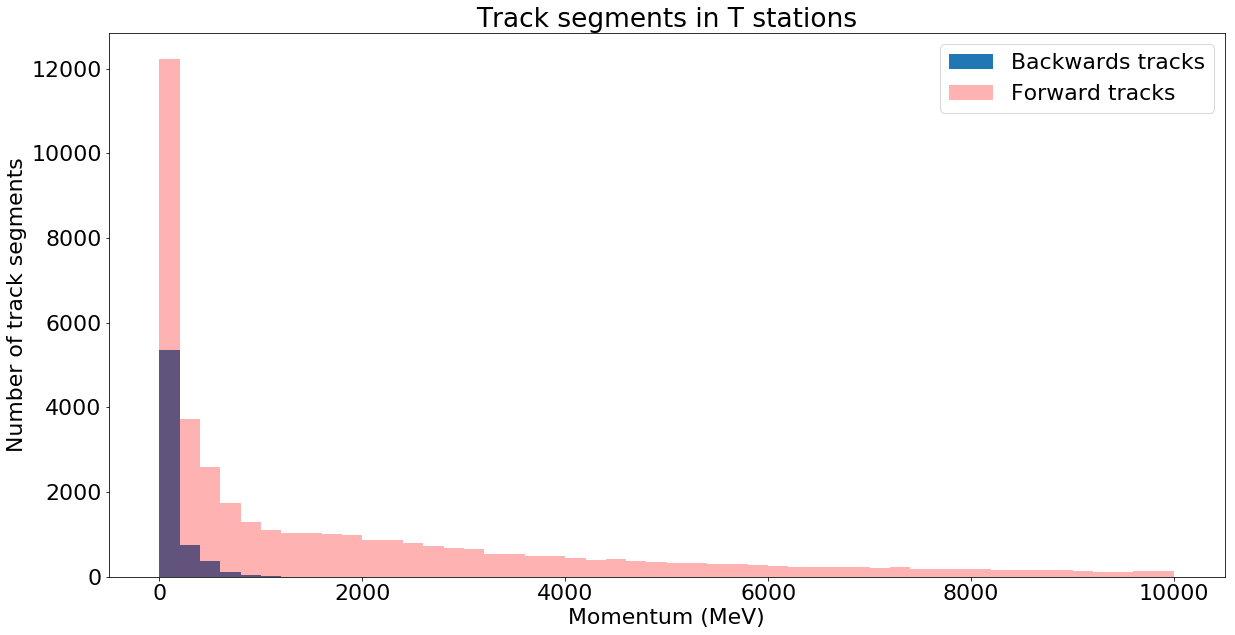

In [34]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.hist(momentumback, bins=50, range=(0,10000), label="Backwards tracks", alpha=1,log=False)
plt.title("Track segments in T stations")
plt.xlabel("Momentum (MeV)")
plt.ylabel("Number of track segments")
plt.hist(momentumforw, bins=50, range=(0,10000),color='r', label="Forward tracks", alpha=0.3,log=False)
plt.legend()
plt.show()